In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal

# Part a

In [22]:
# Loading Dataset
x = []
f =  open("data/data/faithful/faithful.txt",'r')
for line in f.readlines():
    x.append([float(i) for i in line.strip().split(" ")])
x = np.array(x)

x.shape

(272, 2)

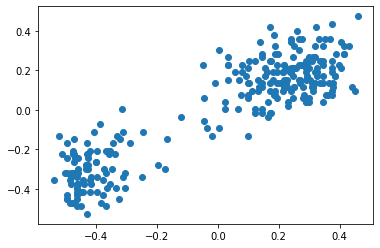

In [23]:
#Normalise the data within [-1, 1]
x =  (x - np.mean(x, axis=0))*(1/(np.max(x,axis=0) - np.min(x, axis=0)))   
plt.scatter(x[:,0], x[:,1])
plt.show()

In [24]:
# Number of clusters
k = 2

# Initialising Cluster parameters
mean = np.array([[-1, 1],[1, -1]])
covariance = np.tile(0.1 * np.eye(2), (k,1,1))
mix = np.ones((k,1))/k

print("Initialisation done. \n mean = \n", mean, "\n covariance = \n", covariance, "\n mixing coefficients = \n", mix)

Initialisation done. 
 mean = 
 [[-1  1]
 [ 1 -1]] 
 covariance = 
 [[[0.1 0. ]
  [0.  0.1]]

 [[0.1 0. ]
  [0.  0.1]]] 
 mixing coefficients = 
 [[0.5]
 [0.5]]


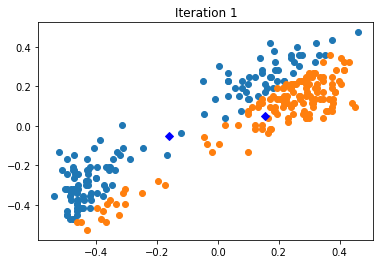

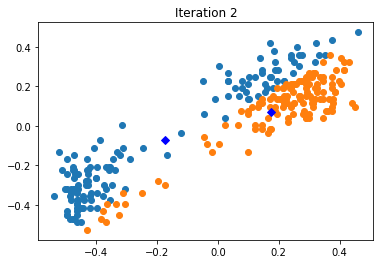

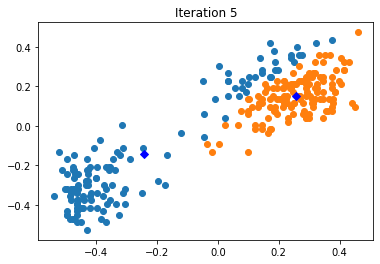

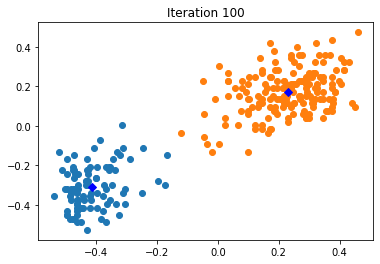

In [25]:
def e_step(x, k, mean, covariance, mix):
    gamma = np.zeros((x.shape[0], k))
    for i in range(k):
        gamma[:,i] = mix[i]*multivariate_normal.pdf(x=x, mean=mean[i], cov=covariance[i])
    temp = np.tile(1/np.sum(gamma, axis=1), (2,1)).transpose()
    return(gamma*temp)  
    
def m_step(x, k, gamma):
    mix = np.sum(gamma, axis=0)/np.sum(gamma)
    mean = np.zeros((k,x.shape[1]))
    covariance = np.zeros((k, x.shape[1], x.shape[1]))
    for i in range(k):
        temp1 = gamma[:,i].reshape(gamma.shape[0],1)
        mean[i] = np.sum(x*temp1, axis=0)/np.sum(gamma[:,i])
        temp2 = x - mean[i]
        temp3 = 0
        for j in range(x.shape[0]):
            temp3 = temp3+gamma[j,i]*np.matmul(temp2[j].reshape(-1,1), temp2[j].reshape(-1,1).transpose())
        covariance[i] = temp3/np.sum(gamma[:,i])
    return mean, covariance, mix


# Performing Updates
max_iter = 100
plot_iter = [1,2,5,100]
for i in range(1, max_iter+1):
    gamma = e_step(x, k, mean, covariance, mix)
    mean, covariance, mix = m_step(x, k, gamma)
    
    # Plotting at desired locations
    if(i in plot_iter):
        cluster_id = np.argmax(gamma, axis=1)
        colours = 'rb'
        plt.clf()
        for j in range(k):
            temp = (cluster_id==j)
            plt.scatter(x[temp,0], x[temp,1])
        plt.plot(mean[:,0], mean[:,1],'bD')
        plt.title("Iteration {}".format(i))
        plt.show()

# Part b

Initialisation done. 
 mean = 
 [[-1 -1]
 [ 1  1]] 
 covariance = 
 [[[0.5 0. ]
  [0.  0.5]]

 [[0.5 0. ]
  [0.  0.5]]] 
 mixing coefficients = 
 [[0.5]
 [0.5]]


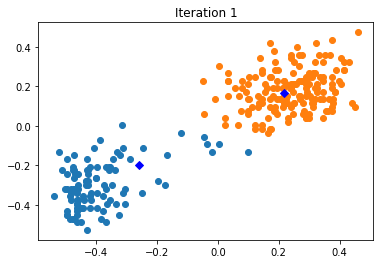

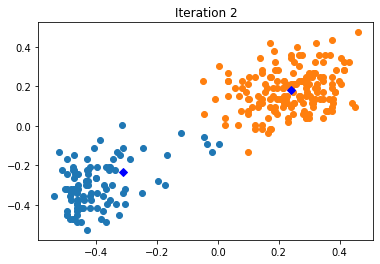

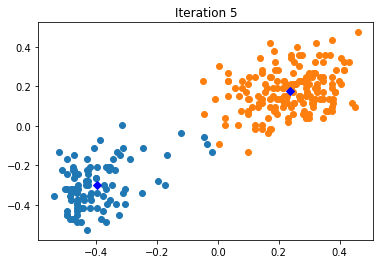

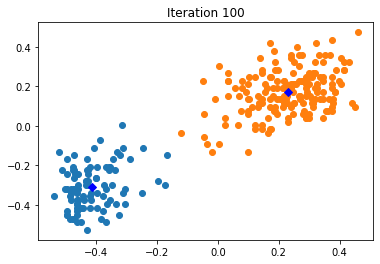

In [26]:
# Loading Dataset
x = []
f =  open("data/data/faithful/faithful.txt",'r')
for line in f.readlines():
    x.append([float(i) for i in line.strip().split(" ")])
x = np.array(x)

#Normalise the data within [-1, 1]
x =  (x - np.mean(x, axis=0))*(1/(np.max(x,axis=0) - np.min(x, axis=0)))   

# Number of clusters
k = 2

# Initialising Cluster parameters
mean = np.array([[-1, -1],[1, 1]])
covariance = np.tile(0.5 * np.eye(2), (k,1,1))
mix = np.ones((k,1))/k

print("Initialisation done. \n mean = \n", mean, "\n covariance = \n", covariance, "\n mixing coefficients = \n", mix)

# Performing Updates
max_iter = 100
plot_iter = [1,2,5,100]
for i in range(1, max_iter+1):
    gamma = e_step(x, k, mean, covariance, mix)
    mean, covariance, mix = m_step(x, k, gamma)
    
    # Plotting at desired locations
    if(i in plot_iter):
        cluster_id = np.argmax(gamma, axis=1)
        colours = 'rb'
        plt.clf()
        for j in range(k):
            temp = (cluster_id==j)
            plt.scatter(x[temp,0], x[temp,1])
        plt.plot(mean[:,0], mean[:,1],'bD')
        plt.title("Iteration {}".format(i))
        plt.show()

# Part c

Initialisation done. 
 mean = 
 [[0 0]
 [0 0]] 
 covariance = 
 [[[0.5 0. ]
  [0.  0.5]]

 [[0.5 0. ]
  [0.  0.5]]] 
 mixing coefficients = 
 [[0.5]
 [0.5]]


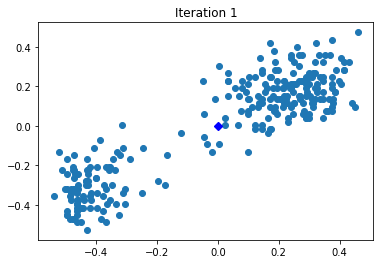

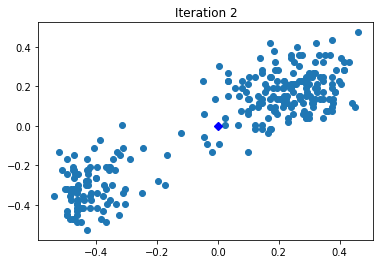

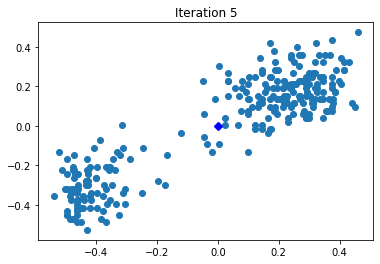

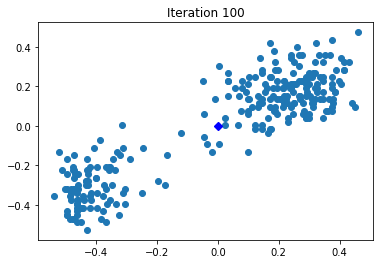

In [27]:
# Loading Dataset
x = []
f =  open("data/data/faithful/faithful.txt",'r')
for line in f.readlines():
    x.append([float(i) for i in line.strip().split(" ")])
x = np.array(x)

#Normalise the data within [-1, 1]
x =  (x - np.mean(x, axis=0))*(1/(np.max(x,axis=0) - np.min(x, axis=0)))   

# Number of clusters
k = 2

# Initialising Cluster parameters
mean = np.array([[0, 0],[0, 0]])
covariance = np.tile(0.5 * np.eye(2), (k,1,1))
mix = np.ones((k,1))/k

print("Initialisation done. \n mean = \n", mean, "\n covariance = \n", covariance, "\n mixing coefficients = \n", mix)

# Performing Updates
max_iter = 100
plot_iter = [1,2,5,100]
for i in range(1, max_iter+1):
    gamma = e_step(x, k, mean, covariance, mix)
    mean, covariance, mix = m_step(x, k, gamma)
    
    # Plotting at desired locations
    if(i in plot_iter):
        cluster_id = np.argmax(gamma, axis=1)
        colours = 'rb'
        plt.clf()
        for j in range(k):
            temp = (cluster_id==j)
            plt.scatter(x[temp,0], x[temp,1])
        plt.plot(mean[:,0], mean[:,1],'bD')
        plt.title("Iteration {}".format(i))
        plt.show()